## Simple Linear Regression Sungur 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')


**CO2 Dataset**

In [2]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [45]:
import missingno as msno

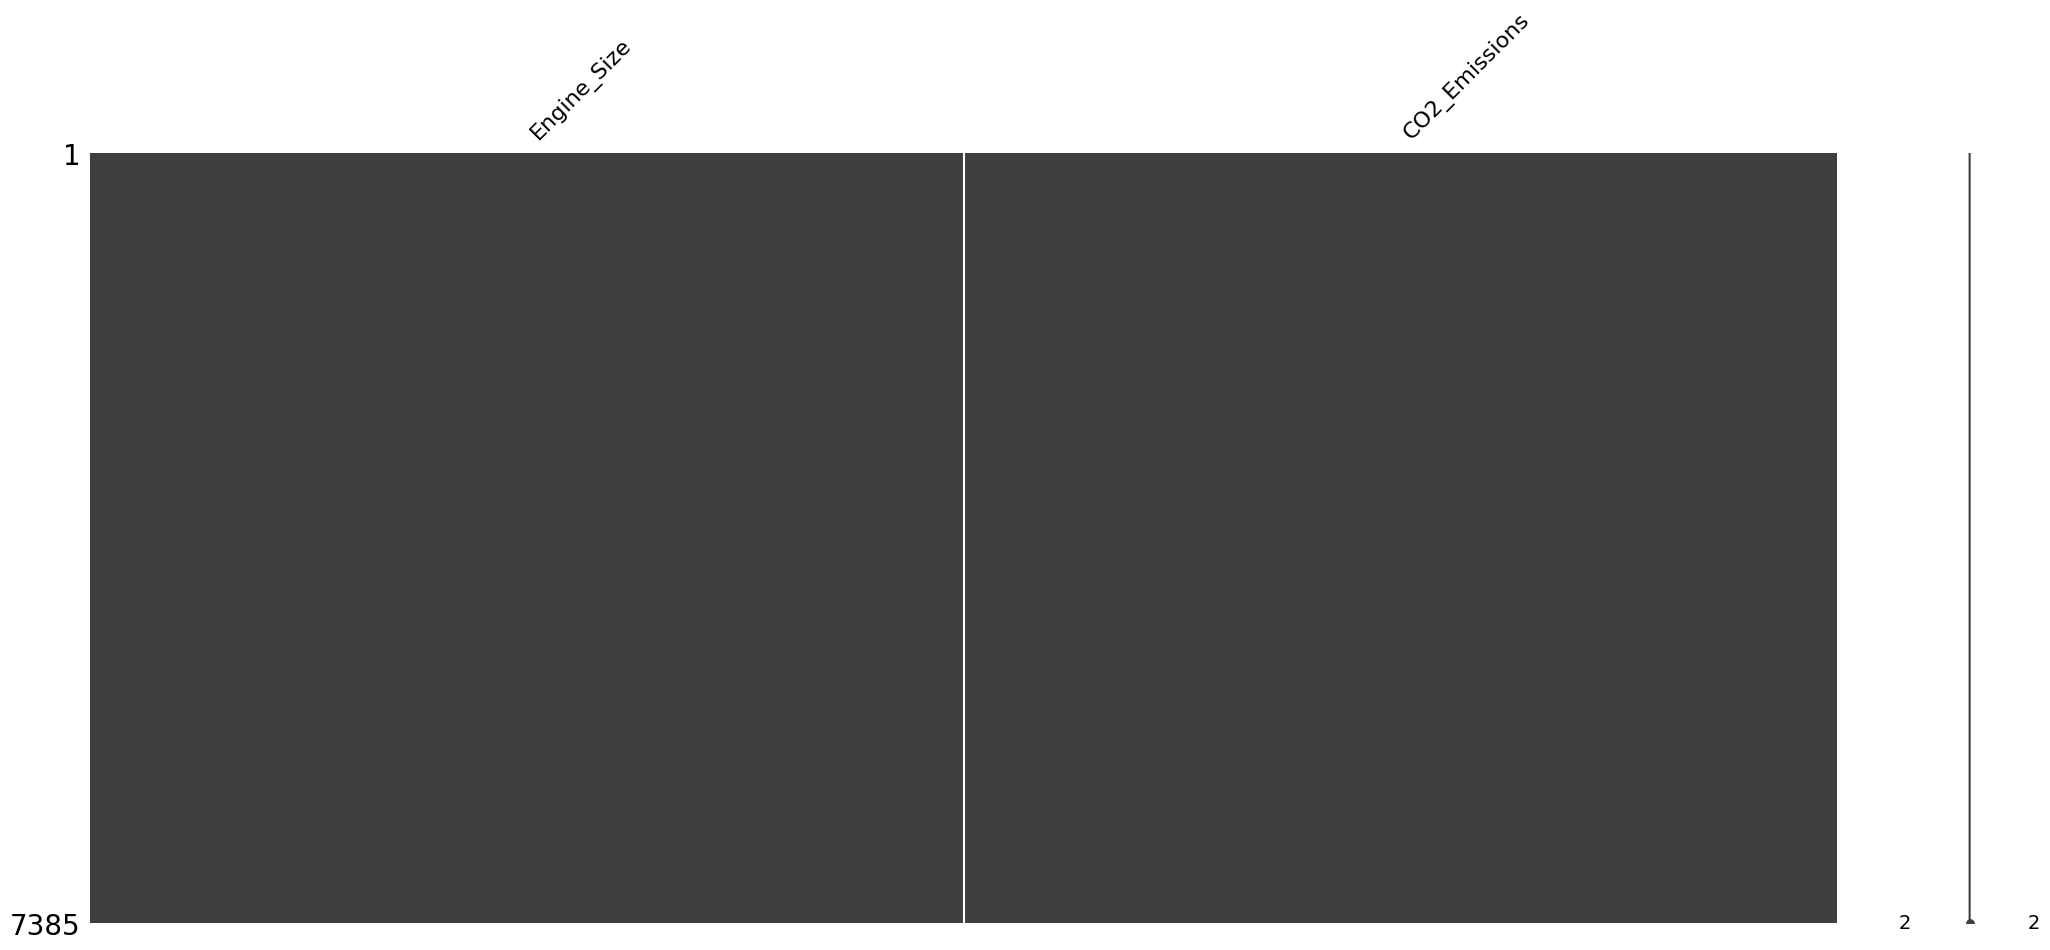

In [46]:
msno.matrix(df);

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [7]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5263,PORSCHE,911 CARRERA CABRIOLET,MINICOMPACT,3.0,6,M7,Z,12.0,8.2,10.3,27,241
5760,FORD,F-150 FFV (LT Tire Pkg),PICKUP TRUCK - STANDARD,3.3,6,AS6,E,16.7,12.6,14.9,19,247
5181,MINI,COOPER 3 DOOR,SUBCOMPACT,1.5,3,M6,Z,8.5,6.2,7.5,38,175
2030,PORSCHE,MACAN TURBO,SUV - SMALL,3.6,6,A7,Z,14.2,10.1,12.3,23,283
5383,TOYOTA,COROLLA LE ECO (1-mode),MID-SIZE,1.8,4,AV,X,7.8,5.9,6.9,41,163


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [9]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


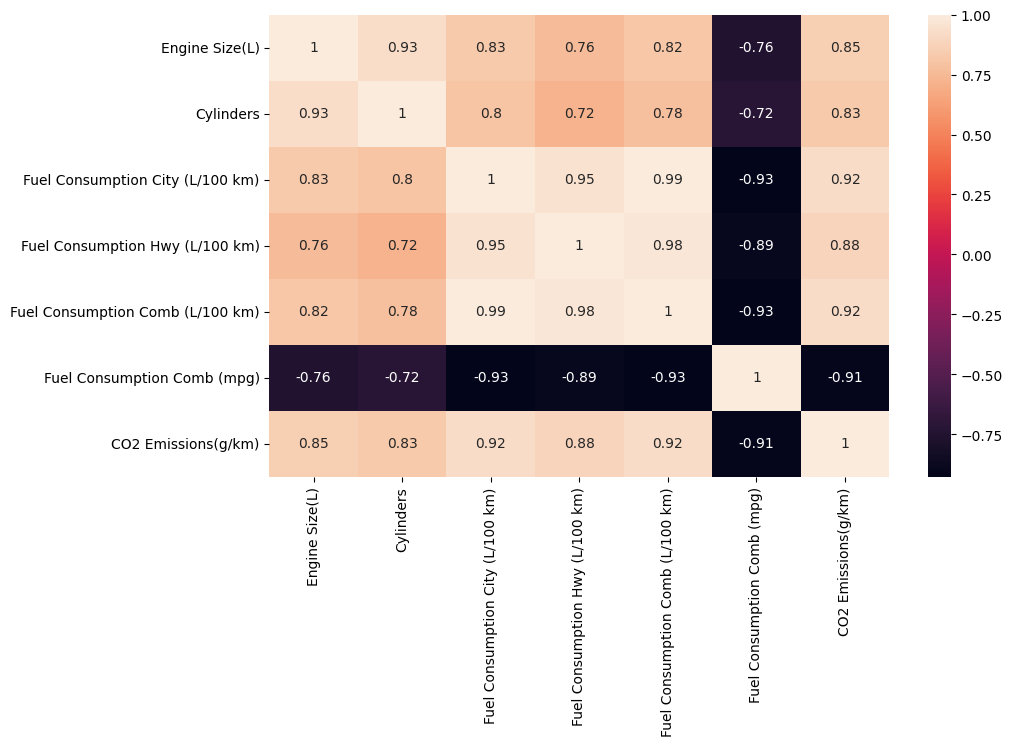

In [10]:
sns.heatmap(df.corr(), annot=True);

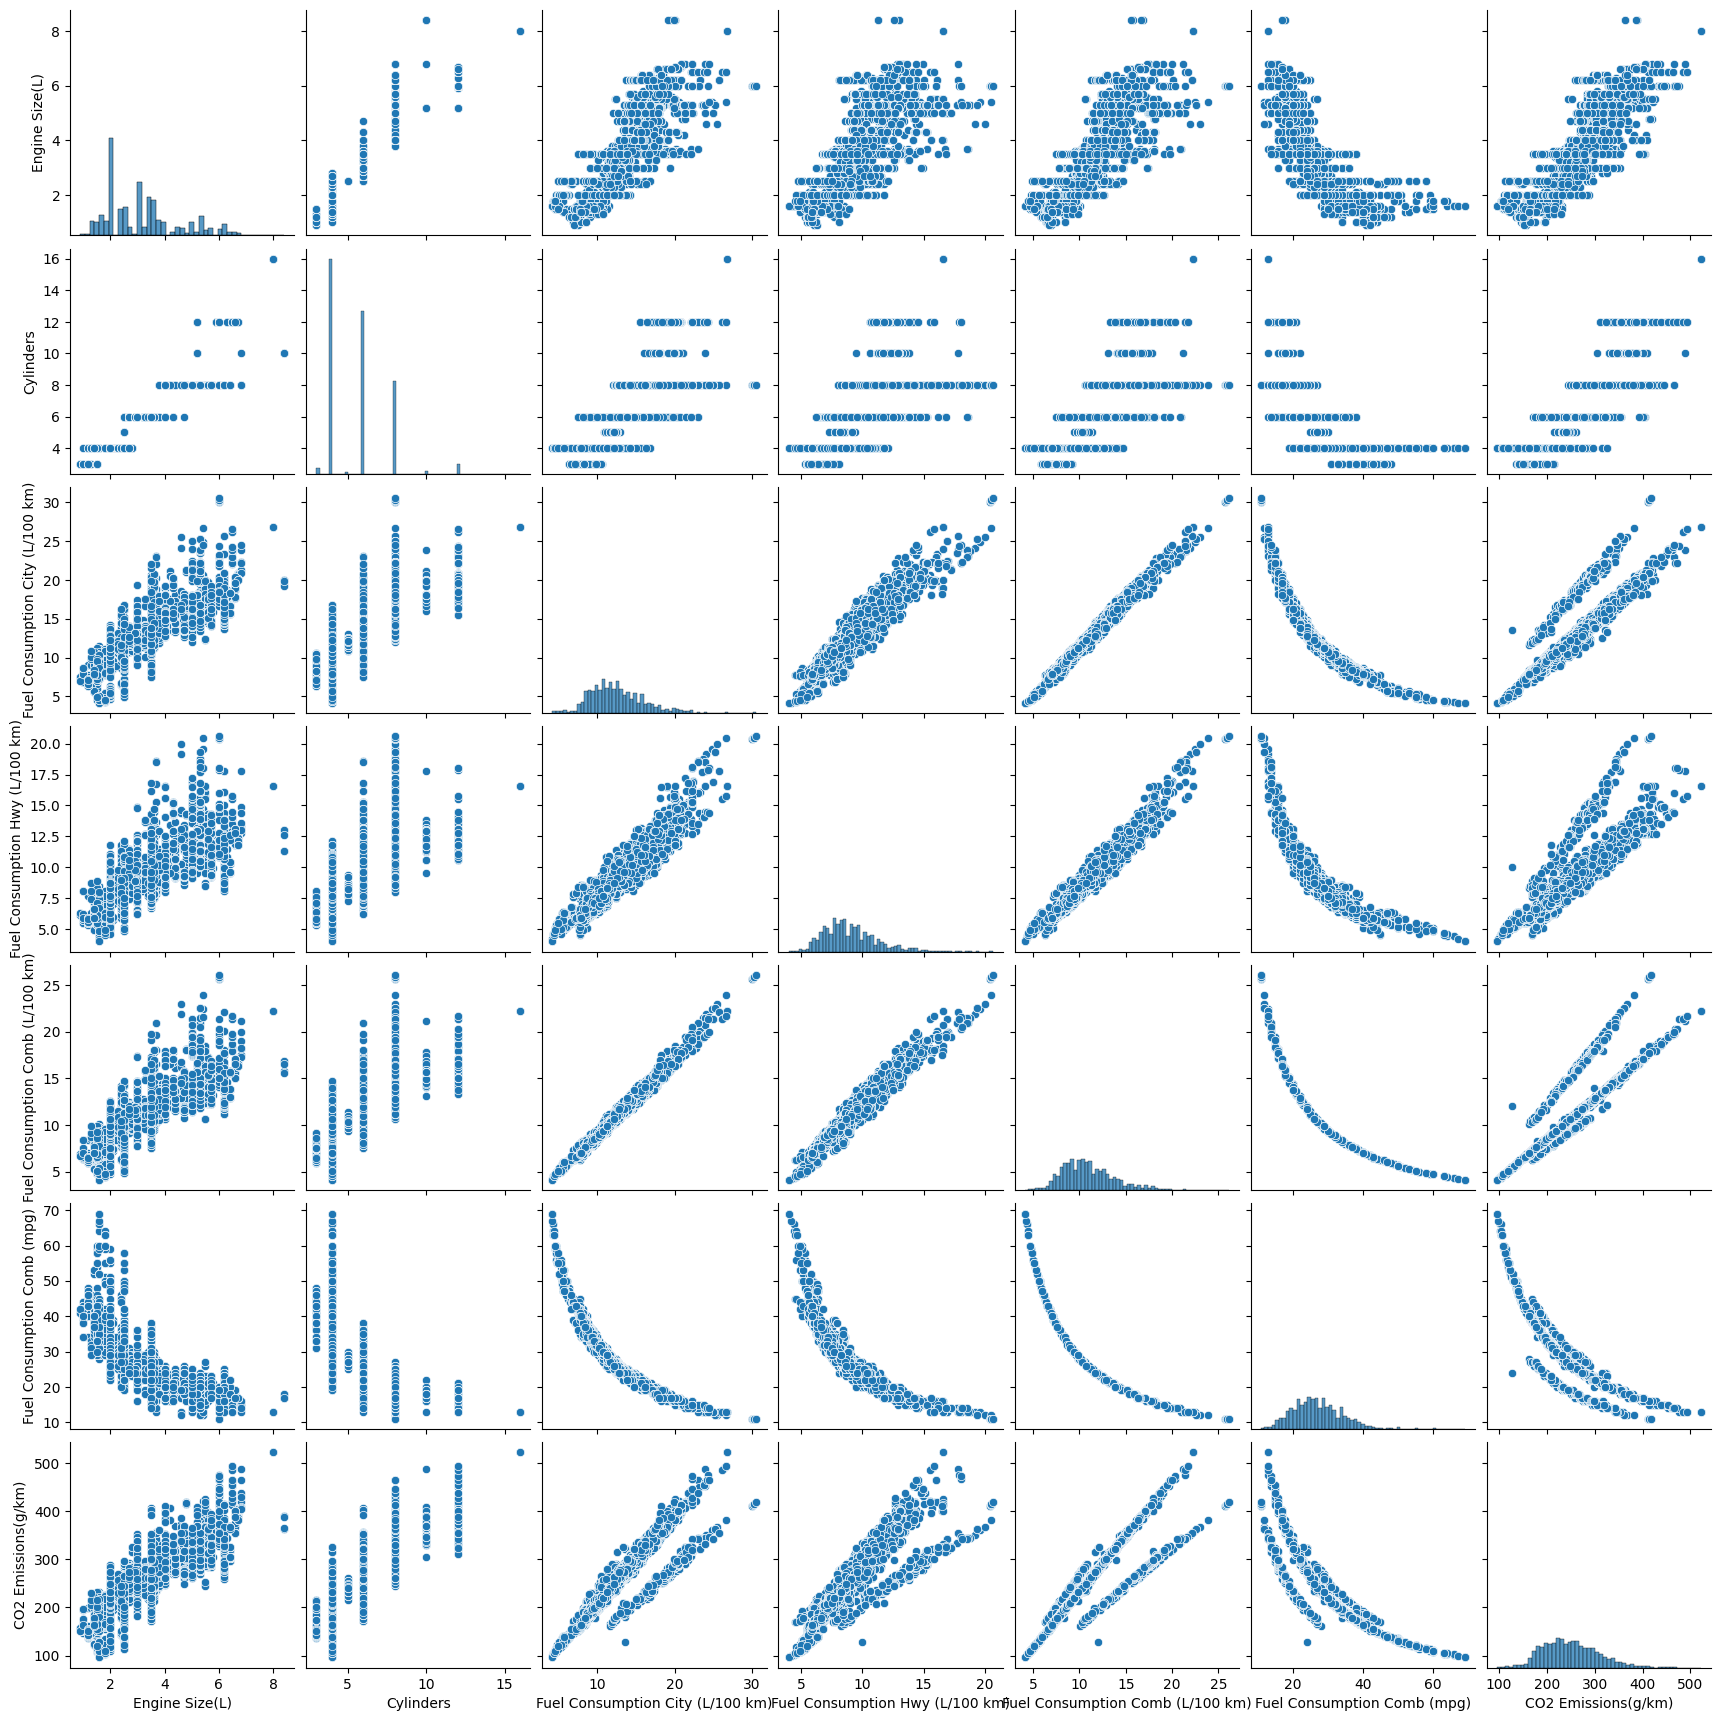

In [11]:
sns.pairplot(df);

In [12]:
import scipy.stats as stats

In [13]:
df = df[["Engine Size(L)", "CO2 Emissions(g/km)"]]
df.head()

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [14]:
df = df.rename(columns={"Engine Size(L)":"Engine_Size", "CO2 Emissions(g/km)":"CO2_Emissions"})
df.sample(5)

,Engine_Size,CO2_Emissions
1627,3.7,269
4538,3.6,311
2167,2.0,175
4621,5.3,305
2275,2.0,207


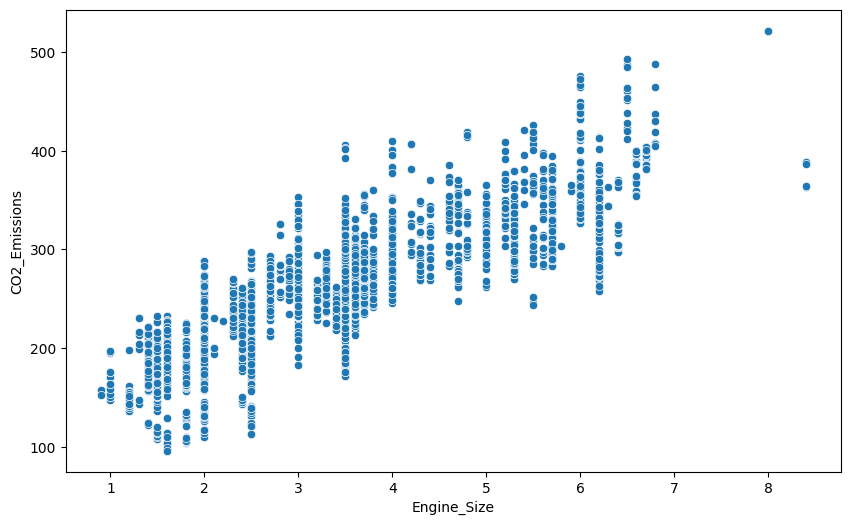

In [15]:
sns.scatterplot(x="Engine_Size", y="CO2_Emissions", data=df);

In [16]:
corr = df.CO2_Emissions.corr(df.Engine_Size)
corr

0.8511446437900011

In [17]:
R2_score = corr**2
R2_score

0.7244472046524079

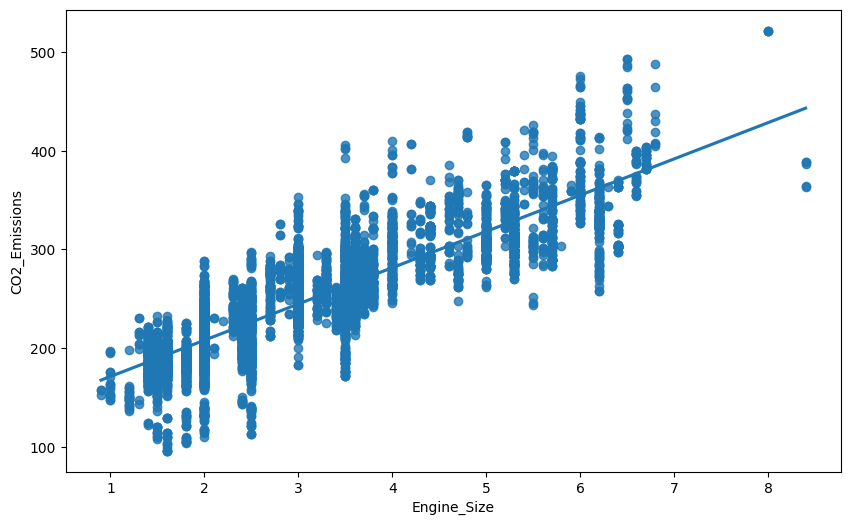

In [18]:
sns.regplot(x="Engine_Size", y="CO2_Emissions", data=df, ci=None);

# Spliting the dataset into X and y 

In [19]:
X = df["Engine_Size"]
y = df["CO2_Emissions"]

In [20]:
np.polyfit(X, y, deg=1)   # b0=134.36  and b1=36.78

array([ 36.77731519, 134.36589272])

In [21]:
slope, intercept = np.polyfit(X, y, deg=1)
print("slope    :", slope)
print("intercept:", intercept)

slope    : 36.77731518642009
intercept: 134.36589272349337


In [22]:
b1, b0 = np.polyfit(X, y, deg = 1)
print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518642009
b0 : 134.36589272349337


In [23]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine_Size, Length: 7385, dtype: float64

In [24]:
values = {"actual_CO2": y, "predicted_CO2":y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual_CO2,predicted_CO2,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [25]:
df_2.residual.sum().round() 

-0.0

In [26]:
df_2.LSE.sum()

6966208.685372684

# Prediction with simple linear regression

In [27]:
potential_engSize= np.linspace(0.5, 9.0, 100) 
potential_engSize

array([0.5       , 0.58585859, 0.67171717, 0.75757576, 0.84343434,
       0.92929293, 1.01515152, 1.1010101 , 1.18686869, 1.27272727,
       1.35858586, 1.44444444, 1.53030303, 1.61616162, 1.7020202 ,
       1.78787879, 1.87373737, 1.95959596, 2.04545455, 2.13131313,
       2.21717172, 2.3030303 , 2.38888889, 2.47474747, 2.56060606,
       2.64646465, 2.73232323, 2.81818182, 2.9040404 , 2.98989899,
       3.07575758, 3.16161616, 3.24747475, 3.33333333, 3.41919192,
       3.50505051, 3.59090909, 3.67676768, 3.76262626, 3.84848485,
       3.93434343, 4.02020202, 4.10606061, 4.19191919, 4.27777778,
       4.36363636, 4.44949495, 4.53535354, 4.62121212, 4.70707071,
       4.79292929, 4.87878788, 4.96464646, 5.05050505, 5.13636364,
       5.22222222, 5.30808081, 5.39393939, 5.47979798, 5.56565657,
       5.65151515, 5.73737374, 5.82323232, 5.90909091, 5.99494949,
       6.08080808, 6.16666667, 6.25252525, 6.33838384, 6.42424242,
       6.51010101, 6.5959596 , 6.68181818, 6.76767677, 6.85353

In [28]:
predicted_co2_lin = b1*potential_engSize + b0
predicted_co2_lin

array([152.75455032, 155.91219859, 159.06984686, 162.22749514,
       165.38514341, 168.54279168, 171.70043996, 174.85808823,
       178.01573651, 181.17338478, 184.33103305, 187.48868133,
       190.6463296 , 193.80397787, 196.96162615, 200.11927442,
       203.27692269, 206.43457097, 209.59221924, 212.74986751,
       215.90751579, 219.06516406, 222.22281234, 225.38046061,
       228.53810888, 231.69575716, 234.85340543, 238.0110537 ,
       241.16870198, 244.32635025, 247.48399852, 250.6416468 ,
       253.79929507, 256.95694334, 260.11459162, 263.27223989,
       266.42988817, 269.58753644, 272.74518471, 275.90283299,
       279.06048126, 282.21812953, 285.37577781, 288.53342608,
       291.69107435, 294.84872263, 298.0063709 , 301.16401918,
       304.32166745, 307.47931572, 310.636964  , 313.79461227,
       316.95226054, 320.10990882, 323.26755709, 326.42520536,
       329.58285364, 332.74050191, 335.89815018, 339.05579846,
       342.21344673, 345.37109501, 348.52874328, 351.68

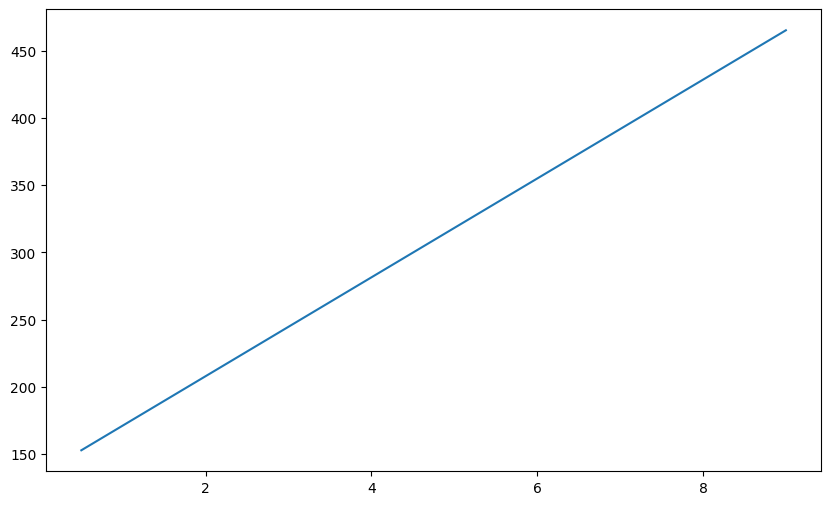

In [29]:
plt.plot(potential_engSize, predicted_co2_lin);

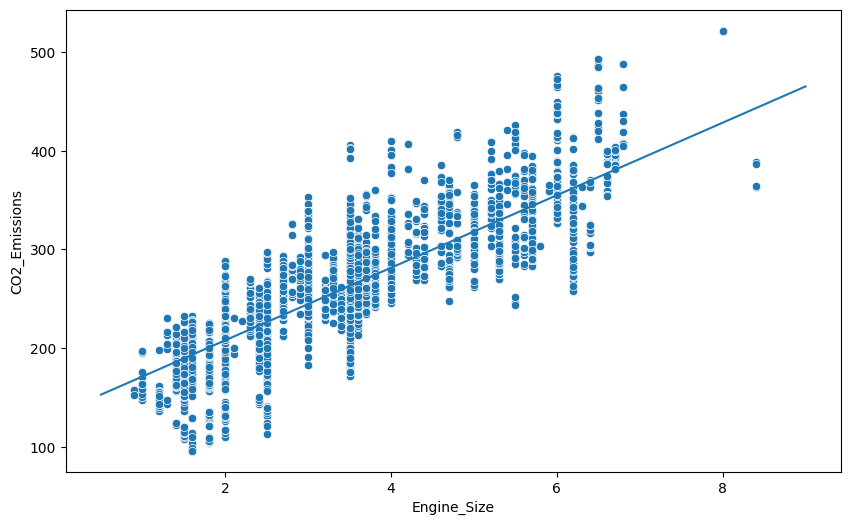

In [30]:
plt.plot(potential_engSize, predicted_co2_lin)
sns.scatterplot(x="Engine_Size", y="CO2_Emissions", data=df);

# To improve the predictions?

In [31]:
a = np.polyfit(X,y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [32]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [33]:
#polynom fonksiyon için tahminleri almış oldum
predicted_co2_poly = a1 * potential_engSize**3 + a2 * potential_engSize**2 + a3 * potential_engSize + a0
predicted_co2_poly

array([120.80806133, 126.56836106, 132.21476847, 137.74938459,
       143.17431049, 148.49164721, 153.70349579, 158.81195728,
       163.81913273, 168.72712318, 173.53802969, 178.2539533 ,
       182.87699506, 187.40925601, 191.8528372 , 196.20983968,
       200.4823645 , 204.6725127 , 208.78238534, 212.81408345,
       216.76970808, 220.65136029, 224.46114111, 228.2011516 ,
       231.87349281, 235.48026577, 239.02357154, 242.50551117,
       245.9281857 , 249.29369618, 252.60414365, 255.86162917,
       259.06825378, 262.22611853, 265.33732446, 268.40397262,
       271.42816406, 274.41199983, 277.35758097, 280.26700854,
       283.14238357, 285.98580711, 288.79938022, 291.58520394,
       294.34537931, 297.08200739, 299.79718921, 302.49302584,
       305.17161831, 307.83506767, 310.48547497, 313.12494126,
       315.75556758, 318.37945499, 320.99870452, 323.61541722,
       326.23169415, 328.84963635, 331.47134486, 334.09892074,
       336.73446503, 339.38007878, 342.03786303, 344.70

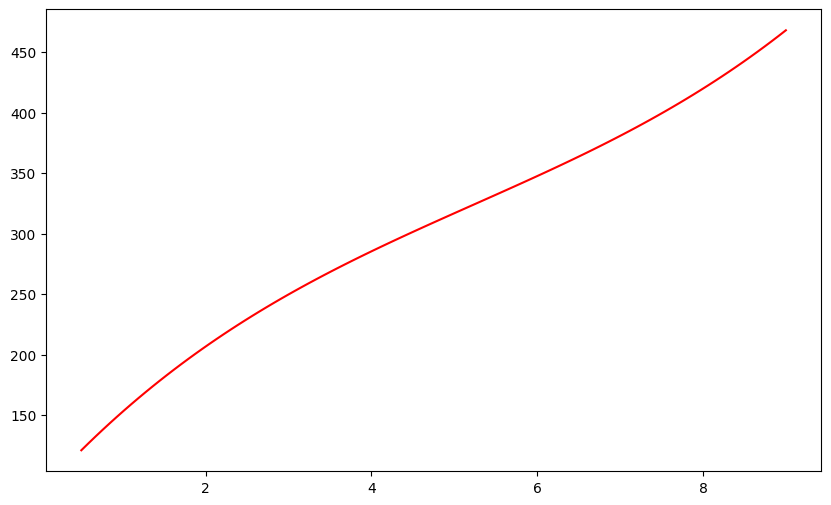

In [34]:
plt.plot(potential_engSize, predicted_co2_poly, color="r");

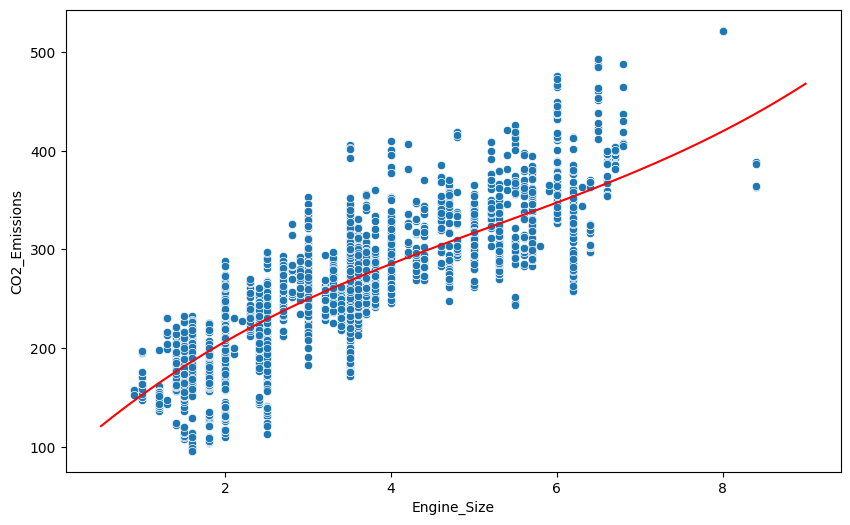

In [35]:
plt.plot(potential_engSize, predicted_co2_poly, color="r");
sns.scatterplot(x="Engine_Size", y="CO2_Emissions", data=df);

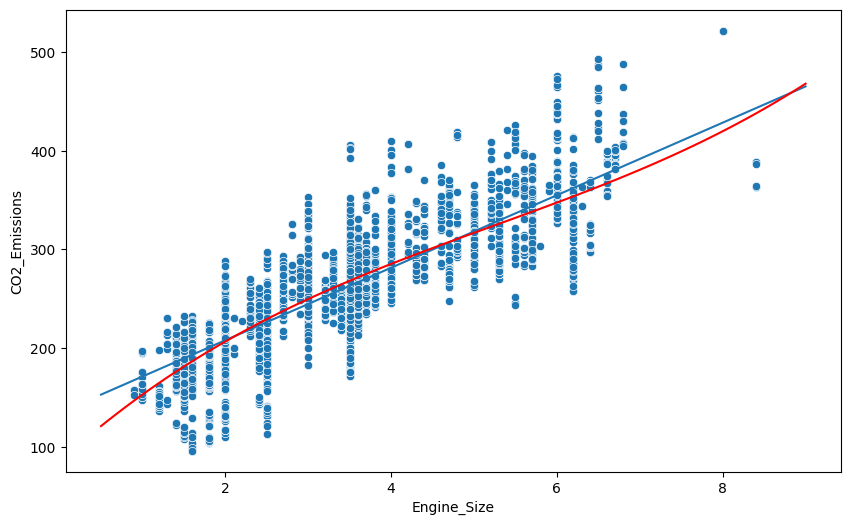

In [36]:
plt.plot(potential_engSize, predicted_co2_lin)
plt.plot(potential_engSize, predicted_co2_poly, color="r");
sns.scatterplot(x="Engine_Size", y="CO2_Emissions", data=df);

In [37]:
eng_size = 2.6
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

229.98691220818563 233.53637870725458


In [38]:
eng_size = 2.2
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

215.27598613361758 215.9845681801998


In [39]:
eng_size = 1.8
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

200.56506005904953 196.81809248307133


In [40]:
eng_size = 1.2
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

178.49867094719747 164.57613897390212


In [41]:
z = np.polyfit(X, y, deg = 5)
z

z1 = np.polyfit(X, y, deg = 10)[0]
z2 = np.polyfit(X, y, deg = 10)[1]
z3 = np.polyfit(X, y, deg = 10)[2]
z4 = np.polyfit(X, y, deg = 10)[3]
z5 = np.polyfit(X, y, deg = 10)[4]
z6 = np.polyfit(X, y, deg = 10)[5]
z7 = np.polyfit(X, y, deg = 10)[6]
z8 = np.polyfit(X, y, deg = 10)[7]
z9 = np.polyfit(X, y, deg = 10)[8]
z10= np.polyfit(X, y, deg = 10)[9]
z0 = np.polyfit(X, y, deg = 10)[10]

pred_lin = b1 * X + b0
pred_poly = z1 * X **10 + z2 * X **9 + z3 * X **8 + z4 * X **7 + z5 * X **6 + z6 * X **5 +z7 * X **4 + z8 * X **3 + z9 * X **2+ z10 * X + z0
print(pred_lin, pred_poly)

values = {"actual": y, "predicted":pred_poly, "resudial": y - pred_poly, "LSE" : (y - pred_poly)**2}
df_pol = pd.DataFrame(values)
df_pol

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine_Size, Length: 7385, dtype: float64 0       205.694138
1       226.325002
2       181.493537
3       267.256741
4       267.256741
           ...    
7380    205.694138
7381    205.694138
7382    205.694138
7383    205.694138
7384    205.694138
Name: Engine_Size, Length: 7385, dtype: float64


,actual,predicted,resudial,LSE
0,196,205.694138,-9.694138,93.976309
1,221,226.325002,-5.325002,28.355647
2,136,181.493537,-45.493537,2069.661886
3,255,267.256741,-12.256741,150.227697
4,244,267.256741,-23.256741,540.875996
...,...,...,...,...
7380,219,205.694138,13.305862,177.045967
7381,232,205.694138,26.305862,691.998382
7382,240,205.694138,34.305862,1176.892176
7383,232,205.694138,26.305862,691.998382


In [42]:
df_pol.LSE.sum()

6664758.761053883

In [43]:
values_lin = {"actual": y, "predicted":pred_lin, "resudial": y - pred_lin, "LSE" : (y - pred_lin)**2}
df_lin = pd.DataFrame(values_lin)
df_lin

,actual,predicted,resudial,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [44]:
df_lin.LSE.sum()

6966208.685372684